#### *******
#### This version is for regenerated sampled 20k data of FB15k-237 and some changes in the relation flattening
#### ******

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import json

import matplotlib.pyplot as plt

### Data 준비

In [2]:
t = pd.read_csv("data/sample_20k_0007.csv")
print(t.columns)
t.head(2)

Index(['1p', '1p_FOL', '1p_origin', '1p_ans', '2p', '2p_FOL', '2p_origin',
       '2p_ans', '3p', '3p_FOL', '3p_origin', '3p_ans', '2i', '2i_FOL',
       '2i_origin', '2i_ans', '3i', '3i_FOL', '3i_origin', '3i_ans', '2in',
       '2in_FOL', '2in_origin', '2in_ans', '3in', '3in_FOL', '3in_origin',
       '3in_ans', 'inp', 'inp_FOL', 'inp_origin', 'inp_ans', 'pin', 'pin_FOL',
       'pin_origin', 'pin_ans', 'pni', 'pni_FOL', 'pni_origin', 'pni_ans',
       'ip', 'ip_FOL', 'ip_origin', 'ip_ans', 'pi', 'pi_FOL', 'pi_origin',
       'pi_ans', '2u', '2u_FOL', '2u_origin', '2u_ans', 'up', 'up_FOL',
       'up_origin', 'up_ans'],
      dtype='object')


,1p,1p_FOL,1p_origin,1p_ans,2p,2p_FOL,2p_origin,2p_ans,3p,3p_FOL,...,pi_origin,pi_ans,2u,2u_FOL,2u_origin,2u_ans,up,up_FOL,up_origin,up_ans
0,"('North Rhine-Westphalia', ('webpage_has_categ...",𝑞 = X? . ∃X: (webpage_has_category('North Rhin...,"(7653, (50,))",{62},"('ETH Zurich', ('people_with_this_degree_are_s...",𝑞 = Y? . ∃X ∃Y: (people_with_this_degree_are_s...,"(8946, (179, 378))",{3219},"('Take-Two Interactive', ('people_with_this_ti...",𝑞 = Z? . ∃X ∃Y ∃Z: (people_with_this_title_are...,...,"((7894, (141, 429)), (3902, (141,)))",{3324},"(('Anne Heche', ('participant_was_canoodled_by...",𝑞 = X? . ∃X : (participant_was_canoodled_by_ce...,"((2084, (247,)), (2742, (155,)), (-1,))",{8209},"((('Paganism', ('religion_is_practiced_by_pers...",𝑞 = Y? . ∃X ∃Y : ((religion_is_practiced_by_pe...,"(((10123, (165,)), (10322, (393,)), (-1,)), (3...",{3091}
1,"('College Station', ('place_is_had_by_hud_coun...",𝑞 = X? . ∃X: (place_is_had_by_hud_county_place...,"(1372, (113,))",{1372},"('Rhys Ifans', ('film_has_performance_by_actor...",𝑞 = Y? . ∃X ∃Y: (film_has_performance_by_actor...,"(6384, (12, 24))",{3032},"('Alyson Stoner', ('celebrity_has_friend_who_i...",𝑞 = Z? . ∃X ∃Y ∃Z: (celebrity_has_friend_who_i...,...,"((10018, (318, 415)), (160, (290,)))",{10674},"(('American International Pictures', ('organiz...",𝑞 = X? . ∃X : (organizations_founded_are_found...,"((11265, (453,)), (32, (97,)), (-1,))",{10089},"((('Kid Rock', ('person_has_spouse_in_marriage...",𝑞 = Y? . ∃X ∃Y : ((person_has_spouse_in_marria...,"(((2742, (384,)), (10858, (401,)), (-1,)), (90,))",{3167}


In [3]:
t["2in_FOL"]

0        𝑞 = X? . ∃X: (hockey_team_has_current_roster_w...
1        𝑞 = X? . ∃X: (costume_design_by_is_performed_b...
2        𝑞 = X? . ∃X: (group_has_regular_performances_a...
3        𝑞 = X? . ∃X: (administrative_area_is_capital_o...
4        𝑞 = X? . ∃X: (ethnicity_has_geographic_distrib...
                               ...                        
19995    𝑞 = X? . ∃X: (film_has_cinematography('I'm Not...
19996    𝑞 = X? . ∃X: (statistical_region_has_gdp_nomin...
19997    𝑞 = X? . ∃X: (award_category_has_category_of('...
19998    𝑞 = X? . ∃X: (organization_founder_has_organiz...
19999    𝑞 = X? . ∃X: (artist_is_in_broadcast_content('...
Name: 2in_FOL, Length: 20000, dtype: object

In [4]:
# t_nlg = pd.read_csv("data/llama_5k_0001.csv")
t_nlg = pd.read_csv("data/FOL2NL_0007.csv")
print(t_nlg.columns)
t_nlg.head(2)

Index(['1p_FOL', '1p_FOL_NL', '2p_FOL', '2p_FOL_NL', '3p_FOL', '3p_FOL_NL',
       '2i_FOL', '2i_FOL_NL', '3i_FOL', '3i_FOL_NL', '2in_FOL', '2in_FOL_NL',
       '3in_FOL', '3in_FOL_NL', 'inp_FOL', 'inp_FOL_NL', 'pin_FOL',
       'pin_FOL_NL', 'pni_FOL', 'pni_FOL_NL'],
      dtype='object')


,1p_FOL,1p_FOL_NL,2p_FOL,2p_FOL_NL,3p_FOL,3p_FOL_NL,2i_FOL,2i_FOL_NL,3i_FOL,3i_FOL_NL,2in_FOL,2in_FOL_NL,3in_FOL,3in_FOL_NL,inp_FOL,inp_FOL_NL,pin_FOL,pin_FOL_NL,pni_FOL,pni_FOL_NL
0,𝑞 = X? . ∃X: (webpage_has_category('North Rhin...,What categories does the webpage about North R...,𝑞 = Y? . ∃X ∃Y: (people_with_this_degree_are_s...,What students at ETH Zurich hold the degree Y?,𝑞 = Z? . ∃X ∃Y ∃Z: (people_with_this_title_are...,What are the currencies in which companies tha...,𝑞 = X? . ∃X : (organization_extra_has_phone_nu...,What Netflix genres is the organization AOL as...,𝑞 = X? . ∃X: (university_has_domestic_tuition_...,What is the tuition fee in common between the ...,𝑞 = X? . ∃X: (hockey_team_has_current_roster_w...,Who are the players on the current roster of t...,𝑞 = X? . ∃X: (genre_is_a_genre_of_film('Experi...,What Experimental films have been nominated fo...,𝑞 = Y? . ∃X ∃Y : ((film_has_other_crew_who_is_...,What are the crew members of the film 'Step Up...,𝑞 = Y? . ∃X ∃Y : ((person_or_entity_appearing_...,What types of appearances in films are made by...,𝑞 = Y? . ∃X ∃Y : ((marriage_is_held_at_locatio...,Which phone numbers in Sleepers are associated...
1,𝑞 = X? . ∃X: (place_is_had_by_hud_county_place...,What places are part of College Station?,𝑞 = Y? . ∃X ∃Y: (film_has_performance_by_actor...,What awards did the films featuring Rhys Ifans...,𝑞 = Z? . ∃X ∃Y ∃Z: (celebrity_has_friend_who_i...,Who are the friends of friends with whom Alyso...,𝑞 = X? . ∃X : (capital_is_had_by_country('Tehr...,What cities are the locations of sports teams ...,𝑞 = X? . ∃X: (film_has_production_companies('T...,What production companies have worked on both ...,𝑞 = X? . ∃X: (costume_design_by_is_performed_b...,Who are the films for which Marit Allen was th...,𝑞 = X? . ∃X: (artist_has_track_contributions_i...,What tracks contributed by James Poyser featur...,𝑞 = Y? . ∃X ∃Y : ((non_profit_organization_is_...,What non-profit organizations registered with ...,𝑞 = Y? . ∃X ∃Y : ((participant_is_friend_of_ce...,What places were the friends of Ryan Reynolds ...,𝑞 = Y? . ∃X ∃Y : ((film_has_distributors_in_re...,Which films produced in London were distribute...


In [5]:
t_train = t.loc[:, ['1p', '1p_FOL', '2p', '2p_FOL', '3p', '3p_FOL', '2i', '2i_FOL', '3i',
       '3i_FOL', '2in', '2in_FOL', '3in', '3in_FOL', 'inp', 'inp_FOL', 'pin',
       'pin_FOL', 'pni', 'pni_FOL', '1p_origin', '1p_ans', '2p_origin', '2p_ans',
       '3p_origin', '3p_ans', '2i_origin', '2i_ans', '3i_origin', '3i_ans',
       '2in_origin', '2in_ans', '3in_origin', '3in_ans', 'inp_origin',
       'inp_ans', 'pin_origin', 'pin_ans', 'pni_origin', 'pni_ans']]
# t_valid = t.loc[:, ['ip', 'ip_FOL', 'pi', 'pi_FOL', '2u',
#        '2u_FOL', 'up', 'up_FOL', 'ip_origin', 'ip_ans', 'pi_origin', 'pi_ans', '2u_origin', '2u_ans',
#        'up_origin', 'up_ans']]

t_nlg_train = t_nlg.loc[:, ['1p_FOL', '1p_FOL_NL', '2p_FOL', '2p_FOL_NL', '3p_FOL', '3p_FOL_NL',
       '2i_FOL', '2i_FOL_NL', '3i_FOL', '3i_FOL_NL', '2in_FOL', '2in_FOL_NL', '3in_FOL', '3in_FOL_NL',
       'inp_FOL', 'inp_FOL_NL', 'pin_FOL', 'pin_FOL_NL', 'pni_FOL',
       'pni_FOL_NL']]
# t_nlg_valid = t_nlg.loc[:, ['ip_FOL', 'ip_FOL_NL',
#        'pi_FOL', 'pi_FOL_NL','2u_FOL', '2u_FOL_NL', 'up_FOL', 'up_FOL_NL']]



In [6]:
with open('data/ent2txt.json') as f:
    ent2txt = json.loads(f.read())
    ent2txt = {k: v for k, v in ent2txt.items()} # for id2rel

ent2txt

{'/m/06rf7': 'Schleswig-Holstein',
 '/m/0c94fn': 'Gary Rydstrom',
 '/m/016ywr': 'Jeremy Irons',
 '/m/01yjl': 'Chicago Cubs',
 '/m/02hrh1q': 'Actor-GB',
 '/m/03ftmg': 'Anthony Horowitz',
 '/m/04p_hy': 'Chapman University',
 '/m/06151l': 'Freddy Rodriguez',
 '/m/07vqnc': 'SpongeBob SquarePants',
 '/m/0jn38': 'Dream Theater',
 '/m/024rbz': 'Focus Features',
 '/m/016ywb': 'Henry V',
 '/m/01pr_j6': 'Himesh Reshammiya',
 '/m/023mdt': 'Maggie Gyllenhaal',
 '/m/025rw19': 'Iron',
 '/m/034wx3': 'Brompton Cemetery',
 '/m/0c5x_': 'University of California, Irvine',
 '/m/0fqpg6b': 'AACTA Award for Best Guest or Supporting Actor in a Television Drama',
 '/m/03qcq': 'Hunter S. Thompson',
 '/m/0lf_w': 'Hanged, drawn and quartered',
 '/m/07k53y': 'USC Trojans football',
 '/m/06zn1c': 'The Pirate Movie',
 '/m/09sh8k': 'Fantastic Four: Rise of the Silver Surfer',
 '/m/06f0y3': 'Port Elizabeth',
 '/m/033x5p': 'University of the Pacific',
 '/m/0f102': 'University of Idaho',
 '/m/095kp': 'Columbia Business 

In [7]:
id2ent = pd.read_pickle("data/FB15k-237-betae/id2ent.pkl")
id2rel = pd.read_pickle("data/FB15k-237-betae/id2rel.pkl")

In [8]:
t_head = t_train.iloc[:, 20::2]
print(t_head.columns)
t_head.head(2)

Index(['1p_origin', '2p_origin', '3p_origin', '2i_origin', '3i_origin',
       '2in_origin', '3in_origin', 'inp_origin', 'pin_origin', 'pni_origin'],
      dtype='object')


,1p_origin,2p_origin,3p_origin,2i_origin,3i_origin,2in_origin,3in_origin,inp_origin,pin_origin,pni_origin
0,"(7653, (50,))","(8946, (179, 378))","(10094, (89, 88, 426))","((12567, (396,)), (2271, (5,)))","((6556, (332,)), (923, (216,)), (923, (332,)))","((6894, (408,)), (4961, (408, -2)))","((12447, (63,)), (5889, (14,)), (1520, (14, -2)))","(((4023, (148,)), (2190, (148, -2))), (149,))","((9961, (418, 419)), (191, (276, -2)))","((10499, (449, 448, -2)), (643, (301,)))"
1,"(1372, (113,))","(6384, (12, 24))","(7354, (238, 246, 90))","((4965, (109,)), (3467, (189,)))","((5715, (172,)), (540, (399,)), (481, (172,)))","((12808, (211,)), (4668, (233, -2)))","((1613, (82,)), (139, (115,)), (139, (150, -2)))","(((11169, (334,)), (1932, (334, -2))), (335,))","((8803, (91, 48)), (6623, (155, -2)))","((4590, (294, 473, -2)), (249, (168,)))"


### Head entity

In [9]:
head = []
# p
head.extend(t_head["1p_origin"].apply(lambda x: x.strip("()").split(",")[0] if pd.notna(x) else np.nan).values.tolist())
head.extend(t_head["2p_origin"].apply(lambda x: x.strip("()").split(",")[0] if pd.notna(x) else np.nan).values.tolist())
head.extend(t_head["3p_origin"].apply(lambda x: x.strip("()").split(",")[0] if pd.notna(x) else np.nan).values.tolist())

# i
# 2i
sub_head1 = []
sub_head2 = []

sub_head1.extend(t_head["2i_origin"].apply(lambda x: x.strip("()").split(",")[0] if pd.notna(x) else np.nan).values.tolist())
sub_head2.extend(t_head["2i_origin"].apply(lambda x: x.strip("()").split(", ")[2].strip("(,") if pd.notna(x) else np.nan).values.tolist())
sub_head = [[a, b] for a, b in zip(sub_head1, sub_head2)]
head.extend(sub_head)

# 3i
sub_head1 = []
sub_head2 = []
sub_head3 = []
sub_head1.extend(t_head["3i_origin"].apply(lambda x: x.strip("()").split(",")[0] if pd.notna(x) else np.nan).values.tolist())
sub_head2.extend(t_head["3i_origin"].apply(lambda x: x.strip("()").split(", ")[2].strip("(,") if pd.notna(x) else np.nan).values.tolist())
sub_head3.extend(t_head["3i_origin"].apply(lambda x: x.strip("()").split(", ")[4].strip("(,") if pd.notna(x) else np.nan).values.tolist())
sub_head = [[a, b, c] for a, b, c in zip(sub_head1, sub_head2, sub_head3)]
head.extend(sub_head)

# in
# 2in
sub_head1 = []
sub_head2 = []

sub_head1.extend(t_head["2in_origin"].dropna().apply(lambda x: x.strip("()").split(",")[0] if pd.notna(x) else np.nan).values.tolist())
sub_head2.extend(t_head["2in_origin"].dropna().apply(lambda x: x.strip("()").split(", ")[2].strip("(,") if pd.notna(x) else np.nan).values.tolist())
sub_head = [[a, b] for a, b in zip(sub_head1, sub_head2)]
head.extend(sub_head)

# 3in
sub_head1 = []
sub_head2 = []
sub_head3 = []
sub_head1.extend(t_head["3in_origin"].dropna().apply(lambda x: x.strip("()").split(",")[0] if pd.notna(x) else np.nan).values.tolist())
sub_head2.extend(t_head["3in_origin"].dropna().apply(lambda x: x.strip("()").split(", ")[2].strip("(,") if pd.notna(x) else np.nan).values.tolist())
sub_head3.extend(t_head["3in_origin"].dropna().apply(lambda x: x.strip("()").split(", ")[4].strip("(,") if pd.notna(x) else np.nan).values.tolist())
sub_head = [[a, b, c] for a, b, c in zip(sub_head1, sub_head2, sub_head3)]
head.extend(sub_head)

# inp
sub_head1 = []
sub_head2 = []

sub_head1.extend(t_head["inp_origin"].dropna().apply(lambda x: x.strip("()").split(",")[0] if pd.notna(x) else np.nan).values.tolist())
sub_head2.extend(t_head["inp_origin"].dropna().apply(lambda x: x.strip("()").split(", ")[2].strip("(,") if pd.notna(x) else np.nan).values.tolist())
sub_head = [[a, b] for a, b in zip(sub_head1, sub_head2)]
head.extend(sub_head)

# pin
sub_head1 = []
sub_head2 = []

sub_head1.extend(t_head["pin_origin"].dropna().apply(lambda x: x.strip("()").split(",")[0] if pd.notna(x) else np.nan).values.tolist())
sub_head2.extend(t_head["pin_origin"].dropna().apply(lambda x: x.strip("()").split(", ")[3].strip("(,") if pd.notna(x) else np.nan).values.tolist())
sub_head = [[a, b] for a, b in zip(sub_head1, sub_head2)]
head.extend(sub_head)

#pni
sub_head1 = []
sub_head2 = []

sub_head1.extend(t_head["pni_origin"].dropna().apply(lambda x: x.strip("()").split(",")[0] if pd.notna(x) else np.nan).values.tolist())
sub_head2.extend(t_head["pni_origin"].dropna().apply(lambda x: x.strip("()").split(", ")[4].strip("(,") if pd.notna(x) else np.nan).values.tolist())
sub_head = [[a, b] for a, b in zip(sub_head1, sub_head2)]
head.extend(sub_head)

print(len(head))
print(head[0])
head[-1]

200000
7653


['6661', '275']

### Relation

In [10]:
# query 모두 tuple로 변경
t_head = t_head.applymap(lambda x: literal_eval(x) if pd.notna(x) else x)

/tmp/ipykernel_23704/4101897943.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  t_head = t_head.applymap(lambda x: literal_eval(x) if pd.notna(x) else x)


In [11]:
relations = []
# p
relations.extend(t_head["1p_origin"].dropna().apply(lambda x: [*x[1]]).values.tolist())
relations.extend(t_head["2p_origin"].dropna().apply(lambda x: [*x[1]]).values.tolist())
relations.extend(t_head["3p_origin"].dropna().apply(lambda x: [*x[1]]).values.tolist())
# i
# 2i
sub_rel1 = []
sub_rel2 = []

sub_rel1.extend(t_head["2i_origin"].dropna().apply(lambda x: [*x[0][1]]).values.tolist())
sub_rel2.extend(t_head["2i_origin"].dropna().apply(lambda x: [*x[1][1]]).values.tolist())
sub_rel = [[*a, *b] for a, b in zip(sub_rel1, sub_rel2)]
relations.extend(sub_rel)

# 3i
sub_rel1 = []
sub_rel2 = []
sub_rel3 = []
sub_rel1.extend(t_head["3i_origin"].dropna().apply(lambda x: [*x[0][1]]).values.tolist())
sub_rel2.extend(t_head["3i_origin"].dropna().apply(lambda x: [*x[1][1]]).values.tolist())
sub_rel3.extend(t_head["3i_origin"].dropna().apply(lambda x: [*x[2][1]]).values.tolist())
sub_rel = [[*a, *b, *c] for a, b, c in zip(sub_rel1, sub_rel2, sub_rel3)]
relations.extend(sub_rel)

# in
# 2in
sub_rel1 = []
sub_rel2 = []

sub_rel1.extend(t_head["2in_origin"].dropna().apply(lambda x: [x[0][1][0]]).values.tolist())
sub_rel2.extend(t_head["2in_origin"].dropna().apply(lambda x: [x[1][1][0]]).values.tolist())
sub_rel = [[*a, *b] for a, b in zip(sub_rel1, sub_rel2)]
relations.extend(sub_rel)

# 3in
sub_rel1 = []
sub_rel2 = []
sub_rel3 = []
sub_rel1.extend(t_head["3in_origin"].dropna().apply(lambda x: [x[0][1][0]]).values.tolist())
sub_rel2.extend(t_head["3in_origin"].dropna().apply(lambda x: [x[1][1][0]]).values.tolist())
sub_rel3.extend(t_head["3in_origin"].dropna().apply(lambda x: [x[2][1][0]]).values.tolist())
sub_rel = [[*a, *b, *c] for a, b, c in zip(sub_rel1, sub_rel2, sub_rel3)]
relations.extend(sub_rel)

# inp
sub_rel1 = []
sub_rel2 = []

sub_rel1.extend(t_head["inp_origin"].dropna().apply(lambda x: [x[0][0][1][0]]).values.tolist())
sub_rel2.extend(t_head["inp_origin"].dropna().apply(lambda x: [x[0][1][1][0], x[1][0]]).values.tolist())
# sub_rel1.extend(t_head["inp_origin"].dropna().apply(lambda x: [x[1][0]]).values.tolist())
# sub_rel2.extend(t_head["inp_origin"].dropna().apply(lambda x: [x[0][1][1][0], x[1][0]]).values.tolist())
sub_rel = [[*a, *b] for a, b in zip(sub_rel1, sub_rel2)]
relations.extend(sub_rel)

# pin
sub_rel1 = []
sub_rel2 = []

sub_rel1.extend(t_head["pin_origin"].dropna().apply(lambda x: [*x[0][1]]).values.tolist())
sub_rel2.extend(t_head["pin_origin"].dropna().apply(lambda x: [x[1][1][0]]).values.tolist())
sub_rel = [[*a, *b] for a, b in zip(sub_rel1, sub_rel2)]
relations.extend(sub_rel)

#pni
sub_rel1 = []
sub_rel2 = []

sub_rel1.extend(t_head["pni_origin"].dropna().apply(lambda x: [*x[0][1][:-1]]).values.tolist())
sub_rel2.extend(t_head["pni_origin"].dropna().apply(lambda x: [x[1][1][0]]).values.tolist())
sub_rel = [[*a, *b] for a, b in zip(sub_rel1, sub_rel2)]
relations.extend(sub_rel)


print(len(relations))
relations[-1]

200000


[208, 348, 208]

### ent & rel 변환 처리

In [12]:
whole_entity = {}
# id2entity mapping을 위한 함수
def replace_list_elements(lst, replace_dict):
    if isinstance(lst, str):
        whole_entity[int(lst)] = whole_entity.get(int(lst), 0) + 1
        return [ent2txt[replace_dict[int(lst)]]]
    else:
        for ent in lst:
            whole_entity[int(ent)] = whole_entity.get(int(ent), 0) + 1
        return [ent2txt[replace_dict[int(x)]] for x in lst]

In [13]:
def get_dimension(lst):
    if isinstance(lst, list):
        # 차원 계산
        return 1 + max(get_dimension(item) for item in lst) if lst else 1
    else:
        # 리스트가 아닌 경우 0
        return 0


In [14]:
whole_relation = {}
# 변환된 데이터 저장을 위한 리스트
mapped_relations = []

# 각 리스트의 값을 매핑하여 변환
for data in relations:
    if get_dimension(data) == 1:
        for rel in data:
            whole_relation[rel] = whole_relation.get(rel, 0) + 1
        mapped_sublist = [id2rel[value] for value in data]
        mapped_relations.append([mapped_sublist])
    else:
        subsub_list = []
        for sublist in data:
            for rel in sublist:
                whole_relation[rel] = whole_relation.get(rel, 0) + 1
            mapped_sublist = [id2rel[value] for value in sublist]
            subsub_list.append(mapped_sublist)
        mapped_relations.append(subsub_list)

print(len(mapped_relations))

200000


In [15]:
re = pd.DataFrame()
# q_entity 추가
re['q_entity'] = head
re.loc[:, "q_entity"] = re.loc[:, "q_entity"].apply(lambda x: replace_list_elements(x, id2ent))


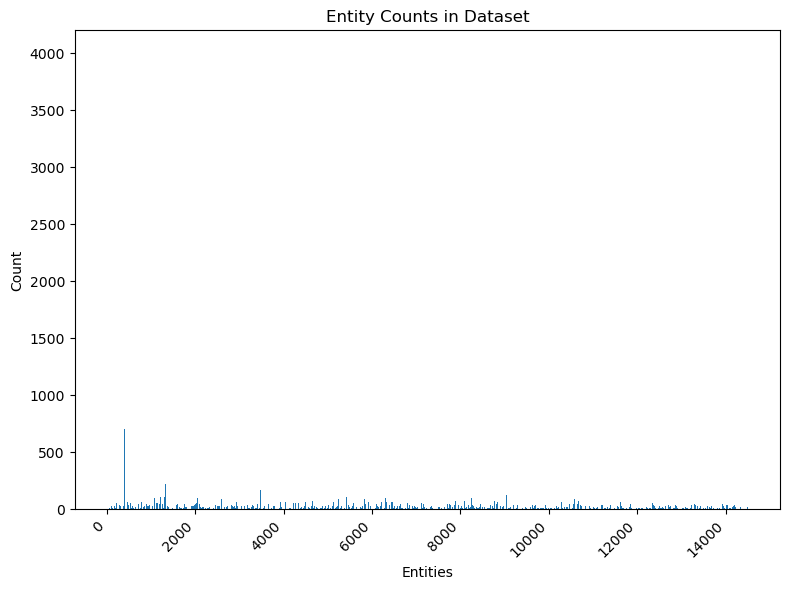

In [16]:
entities = list(whole_entity.keys())
counts = list(whole_entity.values())

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(entities, counts)

# Customize the plot
plt.title('Entity Counts in Dataset')
plt.xlabel('Entities')
plt.ylabel('Count')

# Rotate x-axis labels if there are many entities
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

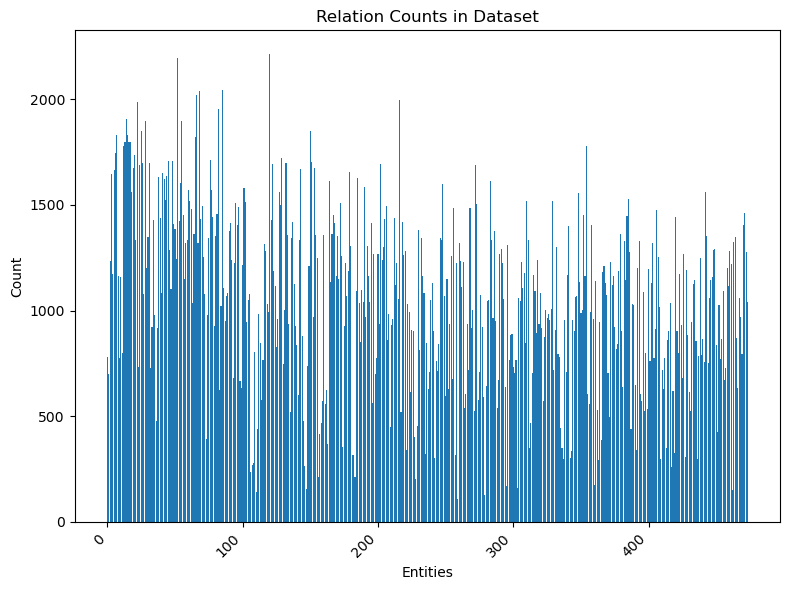

In [17]:
relations = list(whole_relation.keys())
counts = list(whole_relation.values())

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(relations, counts)

# Customize the plot
plt.title('Relation Counts in Dataset')
plt.xlabel('Entities')
plt.ylabel('Count')

# Rotate x-axis labels if there are many entities
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
whole_relation

{50: 1386,
 113: 846,
 16: 1798,
 104: 1051,
 163: 368,
 329: 1518,
 6: 1747,
 341: 1400,
 179: 1656,
 31: 1696,
 10: 1160,
 48: 1706,
 17: 1798,
 63: 1035,
 98: 667,
 12: 1776,
 256: 1486,
 275: 707,
 316: 1091,
 261: 1234,
 134: 938,
 77: 1571,
 5: 1663,
 122: 1694,
 260: 1317,
 377: 843,
 200: 1269,
 40: 1081,
 43: 1523,
 8: 1162,
 248: 1600,
 132: 1696,
 211: 960,
 95: 1509,
 55: 1898,
 202: 1695,
 332: 1302,
 13: 1798,
 461: 1219,
 38: 1633,
 176: 1223,
 160: 1359,
 233: 1165,
 41: 1648,
 308: 1179,
 222: 1031,
 45: 1705,
 89: 1082,
 101: 1579,
 2: 1234,
 25: 1849,
 116: 1314,
 459: 1115,
 460: 1281,
 76: 1712,
 24: 1689,
 219: 1262,
 105: 1080,
 194: 1039,
 278: 590,
 60: 1571,
 375: 922,
 236: 844,
 449: 1293,
 240: 1131,
 137: 1419,
 326: 982,
 225: 908,
 195: 1414,
 164: 1612,
 34: 1426,
 151: 1702,
 190: 1582,
 152: 967,
 138: 1127,
 133: 1358,
 300: 733,
 325: 964,
 168: 1416,
 115: 767,
 454: 864,
 86: 1107,
 30: 1347,
 245: 842,
 381: 638,
 124: 1115,
 216: 1993,
 96: 1402

In [19]:
df = pd.DataFrame({
    "Relations": relations,
    "Counts": counts
})

df

,Relations,Counts
0,50,1386
1,113,846
2,16,1798
3,104,1051
4,163,368
...,...,...
469,279,129
470,439,791
471,413,349
472,417,260


In [20]:
np.mean(df['Counts'])

1054.8523206751054

In [21]:
df.iloc[df['Counts'].sort_values()[-15:].index, :]

,Relations,Counts
162,15,1828
94,7,1831
50,25,1849
213,150,1849
259,28,1895
34,55,1898
96,14,1904
155,82,1953
209,22,1985
86,216,1993


In [22]:
# # 열 행렬화
# ogn = t_nlg_train.iloc[:, 1::2].melt(var_name='query_type', value_name='query')
# # sub = t_nlg.iloc[:, 1::2].melt(var_name='2', value_name='sub')
# ans = t_train.iloc[:, 21::2].melt(var_name='4', value_name='answer')

# re = pd.concat([ogn, ans], axis = 1)
# re.drop(["4"], axis = 1, inplace=True) # 쓸모없는 columns drop

# re = re.iloc[re["query"].dropna().index, :] # NaN 값들 trimming
# re = re.reset_index(drop=True)

# re = re.applymap(lambda x: "{}" if type(x) == float else x) # NaN 값들 빈 set으로 초기화 (answer에만 NaN 존재)

# # re["sub"] = re["sub"].apply(lambda x: x.split(" / ")) # sub-query 리스트로 저장

# # q_entity 추가
# re['q_entity'] = head
# re.loc[:, "q_entity"] = re.loc[:, "q_entity"].apply(lambda x: replace_list_elements(x, id2ent))

# # id로 저장되어 있던 answer entity들 entity화
# re.loc[:, "answer"] = re.loc[:, "answer"].apply(lambda x: replace_list_elements(x.strip("{}").split(', '), id2ent) if x != "{}" else [])
# re["a_entity"] = re["answer"]

# # re['head'] = re['head'].applymap(lambda x: replace_list_entity(x, id2ent))

# # query type 추가
# re["query_type"] = re["query_type"].apply(lambda x: x.split("_")[0])

# re["paths"] = mapped_relations
# re["id"] = re.index

# re

### 마지막 데이터셋

In [23]:
# 열 행렬화
ogn = t_nlg_train.iloc[:, 1::2].melt(var_name='query_type', value_name='query')
# sub = t_nlg.iloc[:, 1::2].melt(var_name='2', value_name='sub')
ans = t_train.iloc[:, 21::2].melt(var_name='4', value_name='answer')

re = pd.concat([ogn, ans], axis = 1)
re.drop(["4"], axis = 1, inplace=True) # 쓸모없는 columns drop

re = re.iloc[re["query"].dropna().index, :] # NaN 값들 trimming
re = re.reset_index(drop=True)

re = re.applymap(lambda x: "{}" if type(x) == float else x) # NaN 값들 빈 set으로 초기화 (answer에만 NaN 존재)

# re["sub"] = re["sub"].apply(lambda x: x.split(" / ")) # sub-query 리스트로 저장

# q_entity 추가
re['q_entity'] = head
re.loc[:, "q_entity"] = re.loc[:, "q_entity"].apply(lambda x: replace_list_elements(x, id2ent))

# id로 저장되어 있던 answer entity들 entity화
re.loc[:, "answer"] = re.loc[:, "answer"].apply(lambda x: replace_list_elements(x.strip("{}").split(', '), id2ent) if x != "{}" else [])
re["a_entity"] = re["answer"]

# re['head'] = re['head'].applymap(lambda x: replace_list_entity(x, id2ent))

# query type 추가
re["query_type"] = re["query_type"].apply(lambda x: x.split("_")[0])

re["paths"] = mapped_relations
re["id"] = re.index

re

/tmp/ipykernel_23704/854546805.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  re = re.applymap(lambda x: "{}" if type(x) == float else x) # NaN 값들 빈 set으로 초기화 (answer에만 NaN 존재)


,query_type,query,answer,q_entity,a_entity,paths,id
0,1p,What categories does the webpage about North R...,[Official Website],[North Rhine-Westphalia],[Official Website],[[+/common/topic/webpage./common/webpage/categ...,0
1,1p,What places are part of College Station?,[College Station],[College Station],[College Station],[[-/location/hud_county_place/place]],1
2,1p,"What awards has Harry Shum, Jr. been nominated...","[Josh Sussman, Jessalyn Gilsig]","[Harry Shum, Jr.]","[Josh Sussman, Jessalyn Gilsig]",[[+/award/award_nominee/award_nominations./awa...,2
3,1p,What are the parent genres of Roots reggae?,[Ska],[Roots reggae],[Ska],[[+/music/genre/parent_genre]],3
4,1p,"What campus is Pembroke College, Cambridge hou...","[Pembroke College, Cambridge]","[Pembroke College, Cambridge]","[Pembroke College, Cambridge]",[[-/education/educational_institution_campus/e...,4
...,...,...,...,...,...,...,...
199995,pni,Which members of the group Pleasantville did n...,[Tobey Maguire],"[Ian MacKaye, Pleasantville]",[Tobey Maguire],"[[+/base/eating/practicer_of_diet/diet, -/base...",199995
199996,pni,Which celebrities did not cuddle with particip...,[Carole Lombard],"[Royal Military Academy Sandhurst, Howard Hughes]",[Carole Lombard],[[+/education/educational_institution/students...,199996
199997,pni,Which films did Dean Cundey work on that did n...,[Just Go With It],"[Dean Cundey, Razzie Award for Worst Supportin...",[Just Go With It],"[[-/film/film/cinematography, +/award/award_wi...",199997
199998,pni,Which government positions held in the 93rd Un...,[90th United States Congress],"[111th United States Congress, 93rd United Sta...",[90th United States Congress],[[-/government/politician/government_positions...,199998


In [24]:
re.to_parquet("data/rog_20k_0007.parquet")